In [288]:
import cv2
import sqlite3
from matplotlib import pyplot as plt
import numpy as np

from visualize_model import Model
from database import blob_to_array, pair_id_to_image_ids

import collections
import seaborn as sns

# 2. Analyze reconstructions using python
## 2.1. Run the notebook, using the Gerrard Hall reconstruction (0.5)
#### <span style='color:Green'> - Add the path to your reconstruction. Answer the questions at the end  </span>

In [148]:
# Add your path
# Get the path of the current notebook
import os
current_path = os.getcwd()
# Cut the current path until the folder "M4_Project"
current_path = current_path[:current_path.find("M4_Project")]
current_path

'/Users/guillemcapellerafont/Documents/Master/M4-3DVision/Projecte/'

In [149]:

reconstruction_path = current_path + "ReconstructionAnna/gerrard-hall/dense/0/sparse"
database_path = current_path + "ReconstructionAnna/gerrard-hall/database.db"
print(reconstruction_path)
print(database_path)

/Users/guillemcapellerafont/Documents/Master/M4-3DVision/Projecte/ReconstructionAnna/gerrard-hall/dense/0/sparse
/Users/guillemcapellerafont/Documents/Master/M4-3DVision/Projecte/ReconstructionAnna/gerrard-hall/database.db


#### Load an existing reconstruction and print its contents

In [150]:
model = Model()
model.read_model(reconstruction_path, ext='.bin') # Should also work with .txt

In [151]:
images = model.images
cameras = model.cameras
points3D = model.points3D

In [152]:
print(f"Loaded {len(images)} images. This is the information available for one of them:")
print(images[1])
print(f"\nLoaded {len(cameras)} cameras. This is the information available for one of them:")
print(cameras[1])
print(f"\nLoaded {len(points3D)} 3D points. This is the information available for one of them:")
print(points3D[1])

Loaded 100 images. This is the information available for one of them:
Image(id=1, qvec=array([ 0.63711573,  0.22454511, -0.25393203,  0.69222942]), tvec=array([-0.72159399, -1.96586695,  2.73697933]), camera_id=1, name='IMG_2387.JPG', xys=array([[ 215.20703474,    9.34729273],
       [ 785.83763929,    2.99797487],
       [ 790.8341331 ,    9.49774243],
       ...,
       [ 534.08214366, 1016.27616386],
       [ 684.9938514 , 1011.77949933],
       [ 684.9938514 , 1011.77949933]]), point3D_ids=array([-1, -1, -1, ..., -1, -1, -1]))

Loaded 1 cameras. This is the information available for one of them:
Camera(id=1, model='PINHOLE', width=1600, height=1052, params=array([1054.24524185, 1054.2247966 ,  800.        ,  526.        ]))

Loaded 42833 3D points. This is the information available for one of them:
Point3D(id=1, xyz=array([-0.02895333, -1.54922488, -1.5828696 ]), rgb=array([205, 210, 213]), error=array(0.39563032), image_ids=array([27, 70, 63,  3]), point2D_idxs=array([  27, 2421, 

#### Load the database

In [153]:
db = sqlite3.connect(database_path)

In [158]:
# keypoints = dict(
#         (image_id, blob_to_array(data, np.float32, (-1, 2)))
#         for image_id, data in db.execute(
#             "SELECT image_id, data FROM keypoints"))

keypoints = dict(
        (image_id, blob_to_array(data, np.float32, (-1, cols)))
        for image_id, cols, data in db.execute(
            "SELECT image_id, cols, data FROM keypoints"))

In [159]:
print(f"Loaded keypoints from {len(keypoints)} images. These are the {len(keypoints[1])} keypoints for one of them:")
print(keypoints[1])

Loaded keypoints from 100 images. These are the 12207 keypoints for one of them:
[[7.5838574e+02 6.1367775e+01 4.0777049e+00 2.3697526e+00]
 [2.7578696e+03 1.1285216e+01 4.1808290e+00 6.2510014e+00]
 [2.7756296e+03 3.3567684e+01 4.9552236e+00 1.4129657e+00]
 ...
 [1.8640872e+03 3.6125742e+03 4.9121723e+01 5.6264076e+00]
 [2.3982122e+03 3.6036423e+03 4.2930962e+01 4.8993421e+00]
 [2.3982122e+03 3.6036423e+03 4.2930962e+01 2.5109098e+00]]


In [164]:
# Aqui no s'hauria d'arreglar el cols ??
matches = dict()
count_no_data = 0
for pair_id, data in db.execute("SELECT pair_id, data FROM matches"):
    if data is None:
        count_no_data += 1
    else:
        matches[pair_id_to_image_ids(pair_id)] = blob_to_array(data, np.uint32, (-1, 2))
print(f"Loaded {len(matches)} matches. {count_no_data}/{len(matches)+count_no_data} matches contained no data")


Loaded 2153 matches. 2797/4950 matches contained no data


In [168]:
print("These are the matches between two images:")
print(matches[1,3])

These are the matches between two images:
[[1459   68]
 [8054  481]
 [8113  482]
 [8114  483]
 [8187  484]
 [6590  512]
 [8009  603]
 [8053  608]
 [8184  611]
 [8111  612]
 [8112  613]
 [8052  774]
 [8182  775]
 [8181  777]
 [5326  783]
 [5806  797]
 [8005  903]
 [8107  907]
 [8110  909]
 [8048  910]
 [8049  911]
 [8180  914]
 [8177  915]
 [8175  916]
 [5067  917]
 [8178  919]
 [5800  926]
 [6416  939]
 [8002 1041]
 [8000 1043]
 [8001 1044]
 [8044 1050]
 [5684 1062]
 [7995 1191]
 [8104 1192]
 [8099 1194]
 [8097 1196]
 [8100 1197]
 [8096 1198]
 [8169 1200]
 [8171 1201]
 [6658 1223]
 [8039 1339]
 [8092 1340]
 [8088 1341]
 [8094 1342]
 [8168 1343]
 [6477 1384]
 [7172 1397]
 [7173 1398]
 [7170 1399]
 [7168 1400]
 [7994 1491]
 [7991 1492]
 [7992 1493]
 [8036 1496]
 [7993 1498]
 [8087 1505]
 [5912 1525]
 [7003 1549]
 [7002 1550]
 [7986 1684]
 [8032 1685]
 [8165 1687]
 [8163 1688]
 [6570 1709]
 [6565 1710]
 [7237 1735]
 [8033 1855]
 [8031 1856]
 [8086 1857]
 [8085 1858]
 [8162 1860]
 [5436 18

#### Visualize the point cloud and cameras

In [ ]:
model.create_window()
model.add_points()
model.add_cameras(scale=0.25)
model.show()

#### <span style='color:Green'>  How many keypoints there are in total? </span> 

In [169]:
sum=0
for i in range(len(keypoints)):
    sum += len(keypoints[i+1])

print(f"Total number of keypoints: {sum}")

Total number of keypoints: 1061700


#### <span style='color:Green'>  How many 3D points originated from a keypoint in the first image? </span>


In [240]:

img_idx = 1

print(f"Check len(images): {len(images)}")
print(f"Check len(keypoints): {len(keypoints)}")

print(f"Check num keypoints first image: {len(keypoints[img_idx])}")
print(f"Check num xys points first image: {len(images[img_idx].xys)}")

print(f"Check first keypoints first image: {keypoints[img_idx][0]}")
print(f"Check first xys points first image: {images[img_idx].xys[0]}")

# Print the kp of the first image in a .txt file
with open("keypoints.txt", "w") as f:
    for i in range(len(keypoints[img_idx])):
        f.write(f"{keypoints[img_idx][i][0]} {keypoints[img_idx][i][1]}\n")

# Print the xys of the first image in a .txt file
with open("xys.txt", "w") as f:
    for i in range(len(images[img_idx].xys)):
        f.write(f"{images[img_idx].xys[i][0]} {images[img_idx].xys[i][1]}\n")



# Find how many 3D points are associated to the first image
points2D_idx = []
for i in range(len(points3D)):
    try:
        if np.any(points3D[i+1].image_ids == img_idx):
            point_idx = np.where(points3D[i+1].image_ids == img_idx)[0].item()
            points2D_idx.append(points3D[i+1].point2D_idxs[point_idx])
    except:
        continue

print(f"\nTotal 3D points: {len(points3D)}")
print(f"Number of 3D points originated from the keypoints of the first image: {len(points2D_idx)}")

sorted_points2D_idx = sorted(points2D_idx)
sorted_points2D_idx

# Find the repeated keypoints --> it means that they are associated to more than one 3D point
print([item for item, count in collections.Counter(sorted_points2D_idx).items() if count > 1]) # LA LLISTA SURT BUIDA, AIXO VOL DIR QUE PER CADA KP GENERA UN I NOMÉS UN PUNT 3D


# print(points3D[4].image_ids)
# print(points3D[5].image_ids)
# print(points3D[6].image_ids)
# print(np.where(points3D[4].image_ids == img_idx)[0].item())
# print(np.where(points3D[5].image_ids == img_idx)[0].item())
# print(np.where(points3D[6].image_ids == img_idx)[0].item())
# print(points3D[4].point2D_idxs)
# print(points3D[5].point2D_idxs)
# print(points3D[6].point2D_idxs)
# print(points3D[4].point2D_idxs[np.where(points3D[4].image_ids == img_idx)[0].item()])
# print(points3D[5].point2D_idxs[np.where(points3D[5].image_ids == img_idx)[0].item()])
# print(points3D[6].point2D_idxs[np.where(points3D[6].image_ids == img_idx)[0].item()])





Check len(images): 100
Check len(keypoints): 100
Check num keypoints first image: 12207
Check num xys points first image: 12207
Check first keypoints first image: [758.38574    61.367775    4.077705    2.3697526]
Check first xys points first image: [215.20703474   9.34729273]

Total 3D points: 42833
Number of 3D points originated from the keypoints of the first image: 2817
[]


## 2.2 Plot the 3D points coloured according to the number of images and error. (0.5)

#### <span style='color:Green'> - Plot the 3D points coloured according to the **number of images** from which it originated. </span> Can you extract any conclusions from the visualization? 

(41327, 3)
(41327,)


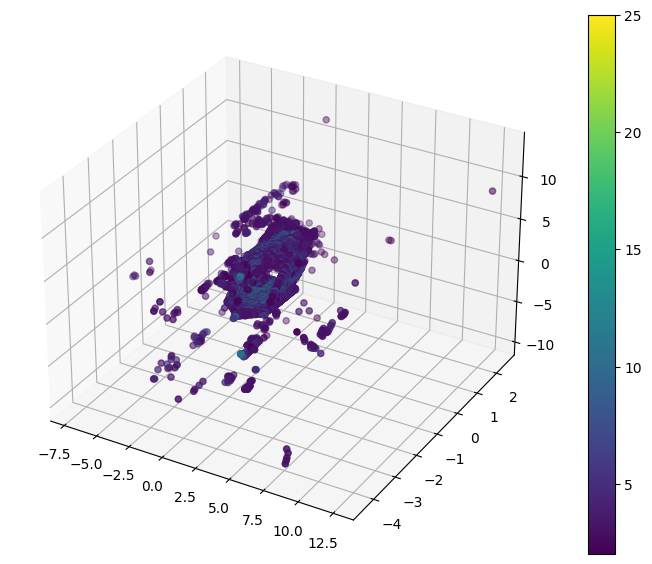

In [280]:
### TO DO 2.2
def draw_points(points, color, ax=None, colorbar=True, only_one_point=False, **plot_kwargs):
    # Creating figure
    
    fig = plt.figure(figsize=(10, 7))
    ax = plt.axes(projection="3d")
    # Creating 3D scatter plot with num_images as intensity of color
    # alpha = num_images / np.max(num_images)
    # ax.scatter3D(points[:, 0], points[:, 1], points[:, 2], c=color, alpha=alpha, **plot_kwargs)
    if only_one_point==False:
        p = ax.scatter3D(points[:, 0], points[:, 1], points[:, 2], c=color, **plot_kwargs)
    else:
        p = ax.scatter3D(points[0], points[1], points[2], c=color, **plot_kwargs)
    if colorbar:
        fig.colorbar(p)



points3D_xyz = []
num_images = []
error = []
rgb = []
for i in range(len(points3D)): 
    try:
        points3D_xyz.append(points3D[i+1].xyz)
        num_images.append(len(points3D[i+1].image_ids))
        error.append(points3D[i+1].error)
        rgb.append(points3D[i+1].rgb)
    except:
        continue

points3D_xyz = np.array(points3D_xyz)
num_images = np.array(num_images)
error = np.array(error)
rgb = np.array(rgb)/255

print(points3D_xyz.shape)
print(num_images.shape)

draw_points(points3D_xyz, color=num_images, ax=None)



#### <span style='color:Green'> - Plot the 3D points coloured according to the **error**. </span> - What is this parameter? Can you extract any conclusions from the visualization?

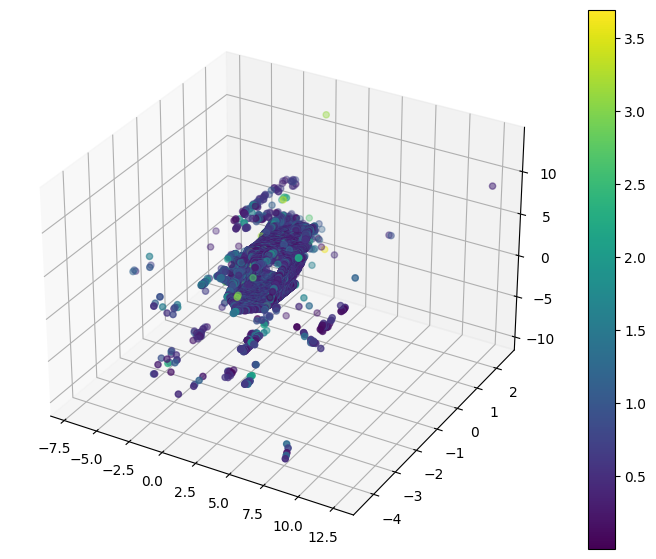

In [281]:
### TO DO 2.2
draw_points(points3D_xyz, color=error, ax=None)

## 2.3 Plot the 3D points that correspond to a keypoint in the first image. Also plot the image with the keypoints (1.0)


[ 0.18042574 -0.788051   -1.7392391 ]
[0.70196078 0.69411765 0.65882353]


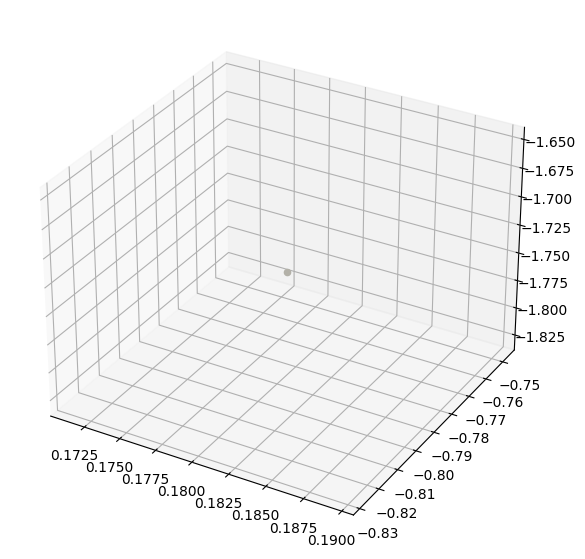

In [284]:
### TO DO 2.3
# We will use one random kp from the first image that we know that it is associated to a 3D point
kp_idx = sorted_points2D_idx[0]
img_idx = 1

point_idx = images[img_idx].point3D_ids[kp_idx]
print(points3D[point_idx].xyz)
print(points3D[point_idx].rgb/255)

draw_points(points3D[point_idx].xyz, [points3D[point_idx].rgb/255], ax=None, colorbar=False, only_one_point=True)

/Users/guillemcapellerafont/Documents/Master/M4-3DVision/Projecte/ReconstructionAnna/gerrard-hall/images/IMG_2387.JPG


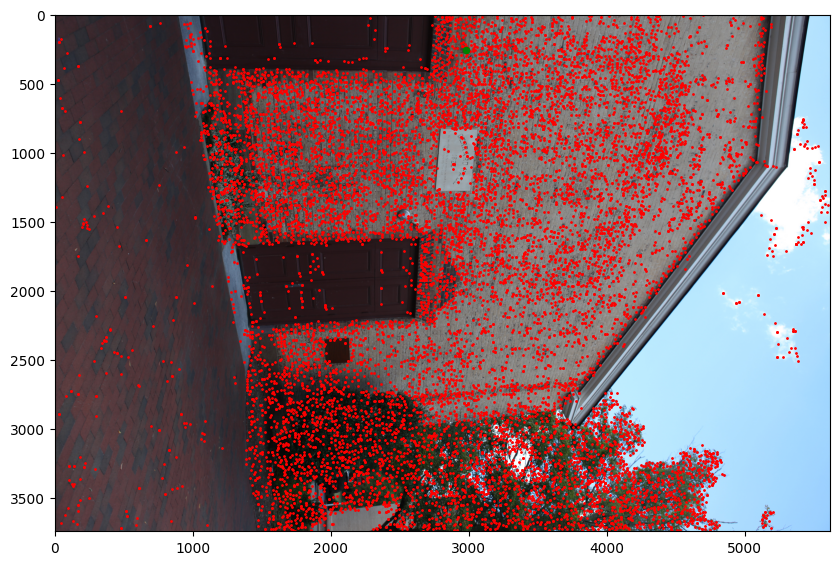

In [285]:

image_name = images[1].name
image_path = database_path[:database_path.rfind('/')] + "/images/" + image_name
print(image_path)

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Plot the image with the keypoints 
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.scatter(keypoints[1][:, 0], keypoints[1][:, 1], s=1, marker="o", color="r")
plt.scatter(keypoints[1][idx_kp,0], keypoints[1][idx_kp,1], s=20, marker="o", color="g")
plt.show()


## 2.4 Create a visualization for the number of matches between all images. (1.0)
For example: https://seaborn.pydata.org/generated/seaborn.heatmap.html

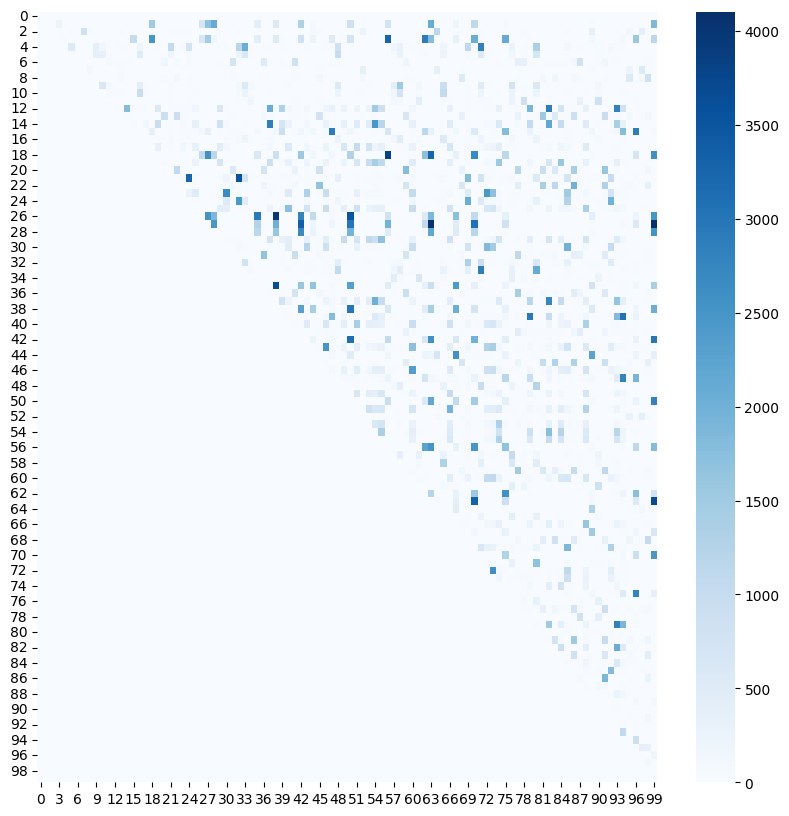

In [294]:
### TO DO 2.4
# Create a matrix that counts the number of matches between each pair of images
matches_matrix = np.zeros((len(images), len(images)))
for i in range(len(images)):
    for j in range(len(images)):
        try:
            matches_matrix[i+1,j+1] = len(matches[i+1,j+1])
        except:
            continue

# Plot the matrix using sns.heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(matches_matrix, cmap="Blues")
plt.show()

## 2.5 Visualize the keypoints and matches between the two images used in lab 4 using Colmap, how it compares to the results from lab 4? (1.0)
#### <span style='color:Green'> You can use the GUI to get the keypoints and matches and then visualize it here, following the same style as in lab 4 to get comparable results. </span>

In [ ]:
### TO DO 2.5

## 2.6 Triangulate and visualize the 3D points from the keypoints extracted using Colmap on the two images used in lab 4, how it compares to the results from lab 4? (1.0) 
#### <span style='color:Green'> - Use the triangulation from lab 4 to the get the 3D points and visualize them following the same style. </span>

In [ ]:
### TO DO 2.6

## 2.7 Visualize the sparse reconstruction using the 2 images from lab 4, and the complete CASTLE dataset. Comment on the differences between techniques and number of images used. (1.0)
#### <span style='color:Green'> - Use the reconstruction from Colmap to the get the 3D points and visualize them following the same style, using two images and the complete dataset. </span>

In [ ]:
### TO DO 2.7